# Example of univariate Taylor series expansion using JAX/jet

In [23]:
import jax
from jax import numpy as jnp
from jax.experimental import jet
from scipy.special import factorial
import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)

In [61]:
# function f(x) to expand in Taylor series
func = lambda x: jnp.sin(x)

x0 = 0

# Derivatives of d^n x/dx^n at x = x0
#     dx/dx = 1, d^2x/dx^2 = 0, ..., d^nx/dx^n = 0
c0 = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # 1..6th-order

# Derivatives d^n f(x)/dx^n at x = x0
c0, c = jet.jet(func, (x0,), (c0,))


# Taylor expansion of function `func` from its derivatives
def func_taylor(x, x0, c):
    dx = (x - x0)[:, None] ** jnp.arange(len(c))[None, :]
    c = c / factorial(jnp.arange(len(c)))
    return jnp.sum(c * dx, axis=-1)


# evaluate Taylor expansion
x = jnp.linspace(-2 * jnp.pi, 2 * jnp.pi, 100)
func_val = func_taylor(x, x0, jnp.array([c0] + c))

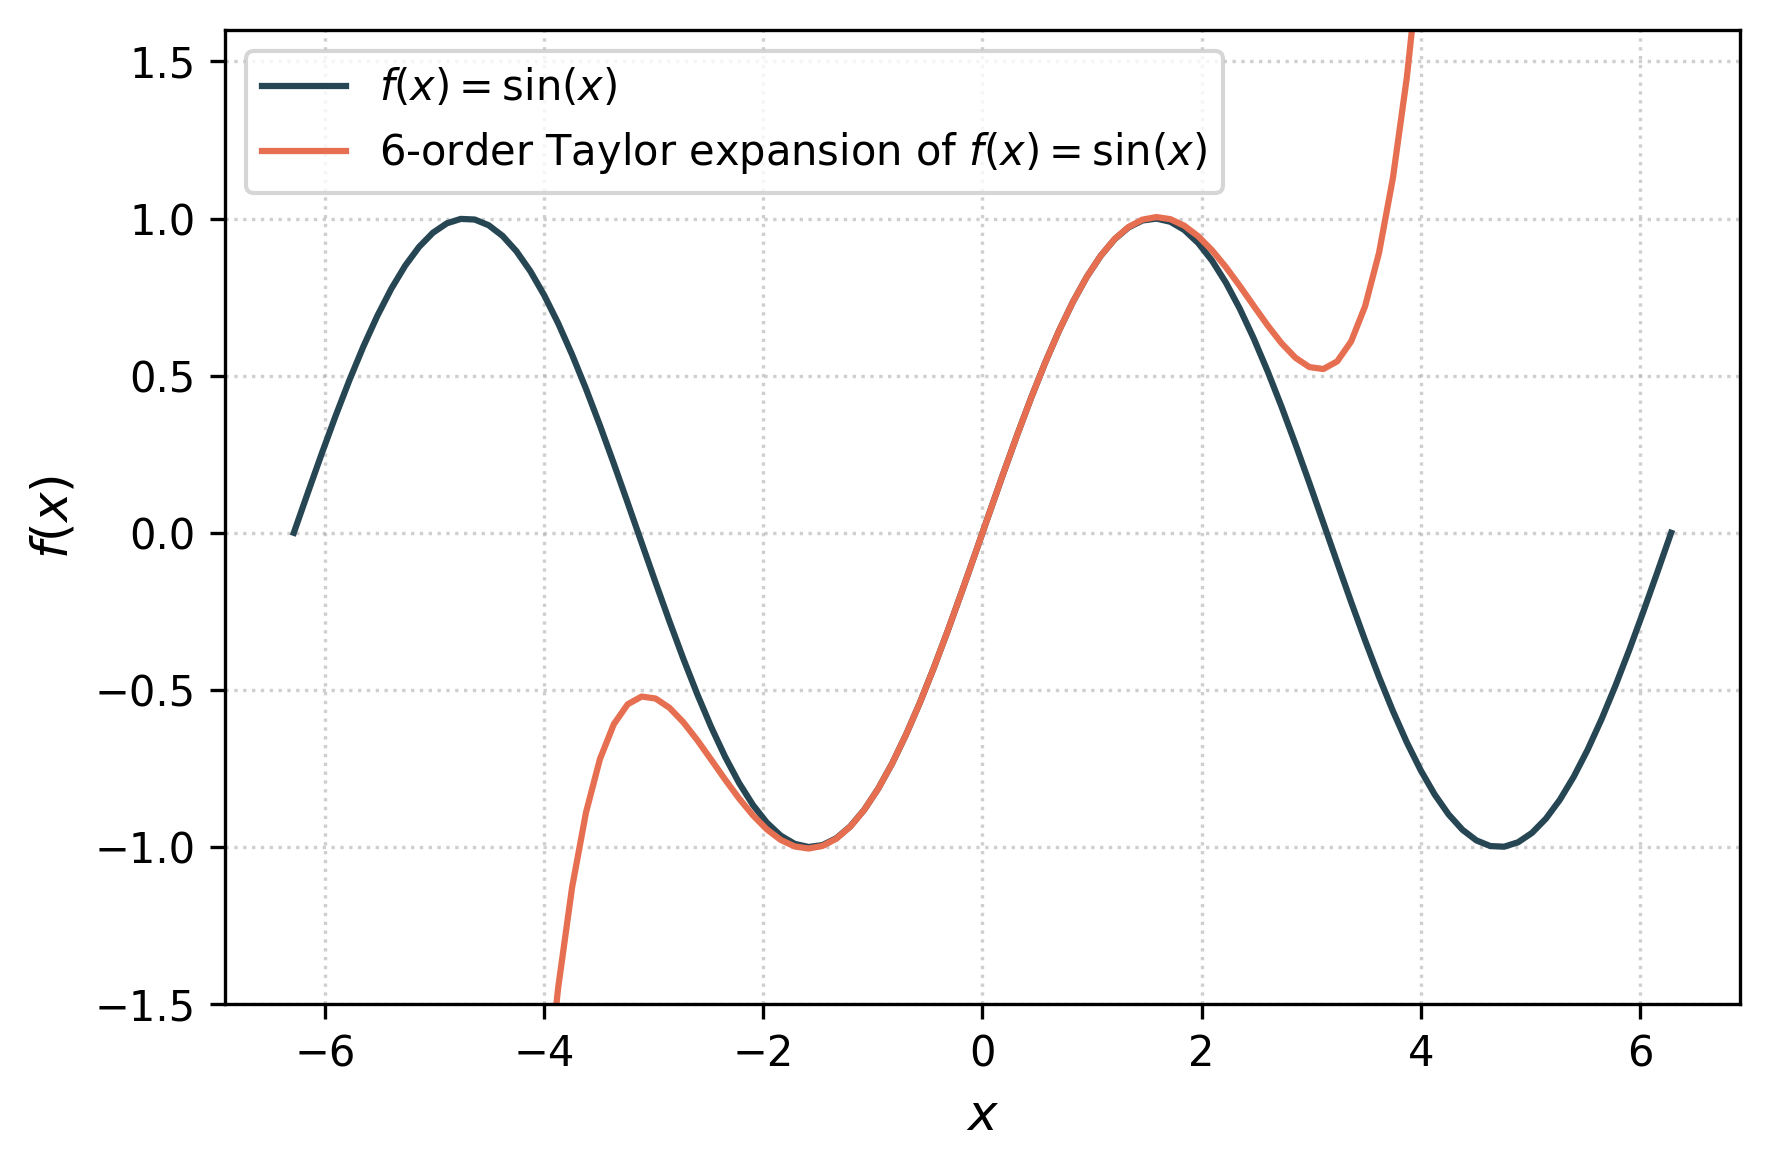

In [66]:
plt.figure(figsize=(6, 4), dpi=300)

plt.plot(
    x,
    func(x),
    label="$f(x)=\\sin(x)$",
    linestyle="-",
    linewidth="1.5",
    color="#264653",
)
plt.plot(
    x,
    func_val,
    label=f"{len(c)}-order Taylor expansion of $f(x)=\\sin(x)$",
    linestyle="-",
    linewidth="1.5",
    color="#e76f51",
)
plt.ylim([-1.5, 1.6])

plt.xlabel("$x$", fontsize=12)
plt.ylabel("$f(x)$", fontsize=12)

plt.grid(True, linestyle=":", alpha=0.6)
plt.legend(fontsize=10, loc="upper left")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()